In [78]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [79]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [80]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [81]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Separate numeric columns (excluding the index column)
numeric_columns = market_data_df.select_dtypes(include=["float64", "int64"]).columns

# Normalize the numeric columns using StandardScaler
scaler = StandardScaler()
market_data_df[numeric_columns] = scaler.fit_transform(market_data_df[numeric_columns])

# Display the normalized DataFrame
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [82]:
# Create a DataFrame with the scaled data

scaled_data = scaler.fit_transform(market_data_df)  # Scale the market_data_df directly

scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)
# Copy the crypto names from the original data

# Set the coinid column as index

# Display sample data
scaled_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [83]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    kmeans.fit(scaled_data_df)

    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"Number of Clusters (k)": k_values, "Inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df

c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,Number of Clusters (k),Inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


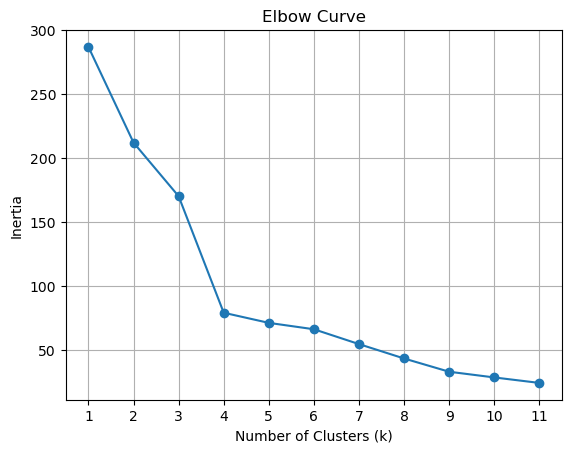

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df["Number of Clusters (k)"], elbow_df["Inertia"], marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(elbow_df["Number of Clusters (k)"])
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [85]:
# Initialize the K-Means model using the best value for k
best_kmeans_model = KMeans(n_clusters=4, random_state=42)
best_kmeans_model.fit(scaled_data_df)
cluster_labels = best_kmeans_model.labels_
scaled_data_df["cluster_label"] = cluster_labels

scaled_data_df.head()

c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_label
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [86]:
# Fit the K-Means model using the scaled data
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(scaled_data_df)
cluster_labels = kmeans_model.labels_
scaled_data_df["cluster_label"] = cluster_labels
scaled_data_df.head()

c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_label
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [87]:
# Predict the clusters to group the cryptocurrencies using the scaled data

predicted_clusters = kmeans_model.predict(scaled_data_df)

# View the resulting array of cluster values.
predicted_clusters

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1])

In [88]:
# Create a copy of the DataFrame
scaled_data_df_copy = scaled_data_df.copy()

scaled_data_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_label
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [89]:
# Add a new column to the DataFrame with the predicted clusters

scaled_data_df['predicted_cluster'] = predicted_clusters
# Display sample data
scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_label,predicted_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0,0


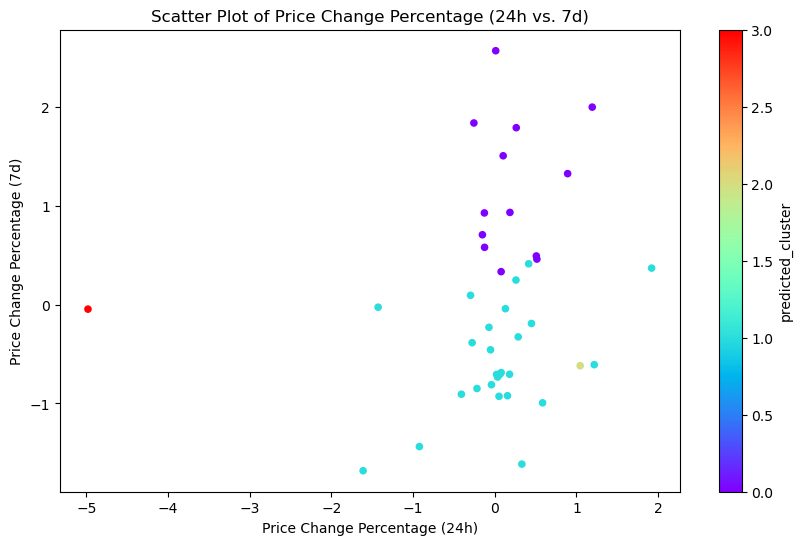

In [90]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_data_df.plot(kind="scatter", x="price_change_percentage_24h", y="price_change_percentage_7d", c="predicted_cluster", cmap="rainbow", figsize=(10, 6))
plt.title("Scatter Plot of Price Change Percentage (24h vs. 7d)")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [91]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [92]:

# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca_model.fit_transform(scaled_data_df)

pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_data_df.index)


# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.240029,0.662441,0.504043
ethereum,-1.064787,0.356097,1.037542
tether,-0.115444,-0.330419,-0.767714
ripple,-0.148123,-0.391832,-0.621214
bitcoin-cash,-2.182107,1.636283,1.563048


In [93]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

for i, var in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {var:.4f}")


Explained Variance for PC1: 0.3958
Explained Variance for PC2: 0.3160
Explained Variance for PC3: 0.1751


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 88.82%

In [94]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_data_df = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2", "PCA3"], index=scaled_data_df.index)

# Copy the crypto names from the original data

# Set the coinid column as index
pca_data_df.index.name = scaled_data_df.index.name

# Display sample data
pca_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-1.240029,0.662441,0.504043
ethereum,-1.064787,0.356097,1.037542
tether,-0.115444,-0.330419,-0.767714
ripple,-0.148123,-0.391832,-0.621214
bitcoin-cash,-2.182107,1.636283,1.563048


### Find the Best Value for k Using the PCA Data

In [95]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_data_df)
    inertia_values.append(kmeans_model.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"Number of Clusters (k)": k_values, "Inertia": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df2.head()

c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,Number of Clusters (k),Inertia
0,1,282.167021
1,2,204.530041
2,3,124.179784
3,4,44.688356
4,5,41.583147


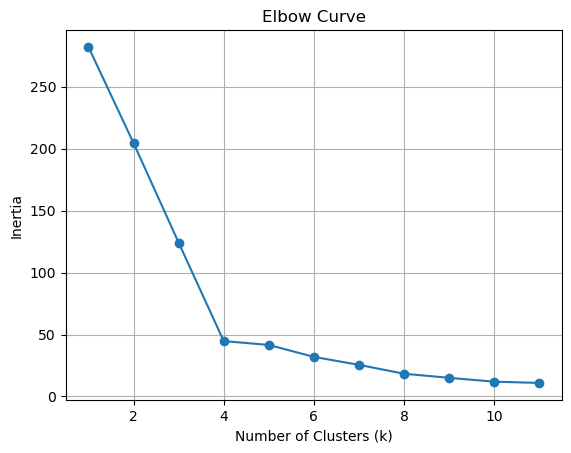

In [96]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df2["Number of Clusters (k)"], elbow_df2["Inertia"], marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  it dosnt

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [97]:
# Initialize the K-Means model using the best value for k
best_k = 4
best_kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [98]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(pca_data_df)


c:\Users\4hara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [99]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = best_kmeans_model.predict(pca_data_df)


# Print the resulting array of cluster values.
predicted_clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2])

In [100]:
# Create a copy of the DataFrame with the PCA data
pca_data_copy = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_copy['predicted_cluster'] = predicted_clusters

# Display sample data
pca_data_copy.head()

,PCA1,PCA2,PCA3,predicted_cluster
coin_id,,,,
bitcoin,-1.240029,0.662441,0.504043,0
ethereum,-1.064787,0.356097,1.037542,0
tether,-0.115444,-0.330419,-0.767714,2
ripple,-0.148123,-0.391832,-0.621214,2
bitcoin-cash,-2.182107,1.636283,1.563048,0


In [102]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_data_copy.hvplot.scatter(x="PCA1", y="PCA2", title="PCA Scatter Plot")

scatter_plot

:Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [136]:
# Use the columns from the original scaled DataFrame as the index.
pca_data_copy_transposed = pca_data_copy.transpose()

correlation_matrix = pca_data_copy_transposed.corr()

def get_top_features(correlation_matrix, component_index, n_top_features=5):
    component_correlation = correlation_matrix.iloc[:, component_index]
    sorted_indices = component_correlation.abs().sort_values(ascending=False).index
    top_features = sorted_indices[:n_top_features]
    return top_features

for i in range(len(correlation_matrix.columns)):
    top_features = get_top_features(correlation_matrix, i)
    print(f"Top features for PC{i+1} (Positive/Negative Influence):")
    print(top_features)

Top features for PC1 (Positive/Negative Influence):
Index(['bitcoin', 'wrapped-bitcoin', 'bitcoin-cash', 'binancecoin',
       'litecoin'],
      dtype='object', name='coin_id')
Top features for PC2 (Positive/Negative Influence):
Index(['ethereum', 'zcash', 'cardano', 'maker', 'cosmos'], dtype='object', name='coin_id')
Top features for PC3 (Positive/Negative Influence):
Index(['tether', 'usd-coin', 'binance-usd', 'true-usd', 'cdai'], dtype='object', name='coin_id')
Top features for PC4 (Positive/Negative Influence):
Index(['ripple', 'huobi-token', 'tether', 'cdai', 'true-usd'], dtype='object', name='coin_id')
Top features for PC5 (Positive/Negative Influence):
Index(['bitcoin-cash', 'bitcoin', 'wrapped-bitcoin', 'binancecoin',
       'litecoin'],
      dtype='object', name='coin_id')
Top features for PC6 (Positive/Negative Influence):
Index(['binancecoin', 'bitcoin', 'bitcoin-cash', 'wrapped-bitcoin', 'monero'], dtype='object', name='coin_id')
Top features for PC7 (Positive/Negative In

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** bitcoin, tether and true-usd have the most frequent strongest influence on components at 5 times each

here is the top influencer count list 

ethereum: 4

zcash: 3

cardano: 3

maker: 3

cosmos: 3

tether: 5

usd-coin: 4

binance-usd: 4

true-usd: 5

cdai: 4

ripple: 2

huobi-token: 3

bitcoin-cash: 4

bitcoin: 5

wrapped-bitcoin: 3

binancecoin: 3

litecoin: 3

chainlink: 3

theta-token: 2

eos: 3

stellar: 2

iota: 3

dash: 3

nem: 2

omisego: 2

neo: 3

leo-token: 3

ontology: 3

ftx-token: 3

havven: 2

ethlend: 1

celsius-degree-token: 1
    